In [10]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from indicators import calculate_all_indicators

In [5]:
def demo_step(row, capital, position, data, buy_signals, sell_signals, stop):
    comission = 0.003

    if row['Buy'] and position == 0:
        entry_price = row['Close']
        shares_to_buy = capital // entry_price  # Целое количество акций
        new_position = shares_to_buy
        new_capital = capital - shares_to_buy * entry_price
        buy_signals[0].append(row['Date'])
        buy_signals[1].append(entry_price)
        df = data[data['Date'] <= row['Date']]
        plt.plot(df['Date'], df['Close'], label='Цена', color='blue')
        plt.scatter(buy_signals[0], buy_signals[1], marker='^', color='green', label='Покупка', s=100)
        plt.scatter(sell_signals[0], sell_signals[1], marker='v', color='red', label='Продажа', s=100)
        plt.xlabel('Дата')
        plt.ylabel('Цена')
        plt.legend()
        plt.grid()

        buf = BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)  # Перемещаем указатель в начало буфера
        plt.close()  # Закрываем фигуру после сохранения

        return 'Buy', new_capital, new_position, buf
    
    elif (row['Sell'] or row['Close'] < stop) and position > 0:
        new_capital = capital + position * row['Close'] * (1 - comission)

        sell_signals[0].append(row['Date'])
        sell_signals[1].append(row['Close'])


        df = data[data['Date'] <= row['Date']]
        plt.plot(df['Date'], df['Close'], label='Цена', color='blue')
        plt.scatter(buy_signals[0], buy_signals[1], marker='^', color='green', label='Покупка', s=100)
        plt.scatter(sell_signals[0], sell_signals[1], marker='v', color='red', label='Продажа', s=100)
        plt.xlabel('Дата')
        plt.ylabel('Цена')
        plt.legend()
        plt.grid()

        buf = BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)  # Перемещаем указатель в начало буфера
        plt.close()  # Закрываем фигуру после сохранения

        return 'Sell', new_capital, 0, buf
    else:
        return 'nothing', capital, position, None

In [6]:
model = CatBoostClassifier()
model.load_model('catboost_model.cbm')

buy = 0.52
sell = 0.47

# данные для демо
data = pd.read_csv('data/GAZP_161221_241221.csv', delimiter=';')
data.columns = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Vol']
data_indicators = calculate_all_indicators(data)
data_preds = model.predict_proba(data_indicators.drop(columns=['Date']))[:, 1]
data_indicators['Buy'] = data_preds > buy
data_indicators['Sell'] = data_preds < sell
data_2024 = data_indicators[data_indicators['Date'] > 240000]
data_2024['Date'] = pd.to_datetime(data_2024['Date'], format='%y%m%d')

c:\Users\kitub\Documents\BOT\indicators.py:138: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Negative Money Flow'].iloc[i] = data['Money Flow'].iloc[i]
c:\Users\kitub\Documents\BOT\indicators.py:138: SettingWithCopyWarning: 
A value i

In [3]:
from load_api import get_figi_by_ticker, load_df

TOKEN = "t.wjnuWsY82HsHfGHSWJA7n8rAx66AOrLMHeV_DjiBD9ZQ0ALrPpljPxsx3fpZgQYwyuyO77Nckl5Mb2f3aOm0sA"
aflt_figi = get_figi_by_ticker(TOKEN, 'AFLT')
aflt_figi

'BBG004S683W7'

In [5]:
aflt_df = load_df(TOKEN, figi=aflt_figi, days=3000, lot=1)
aflt_df

c:\Users\kitub\Documents\BOT\indicators.py:136: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Positive Money Flow'].iloc[i] = data['Money Flow'].iloc[i]
c:\Users\kitub\Documents\BOT\indicators.py:136: SettingWithCopyWarning: 
A value i

,Open,High,Low,Close,Vol,RSI,Aroon_Up,Aroon_Down,ATR,Date,...,PSAR_Hist-1,MACD_Hist-1,PSAR_Hist-2,MACD_Hist-2,PSAR_Hist-3,MACD_Hist-3,PSAR_Hist-4,MACD_Hist-4,PSAR_Hist-5,MACD_Hist-5
31,130.89,130.89,129.20,129.20,160160,34.098019,100.000000,71.428571,3.952143,2016-11-22 00:00:00+00:00,...,8.440000,-0.432236,-1.236337,-0.468110,-2.946103,-0.494440,-2.394152,-0.420533,-3.062928,-0.428865
32,129.72,132.29,129.13,130.86,436400,50.030506,100.000000,78.571429,3.745714,2016-11-23 00:00:00+00:00,...,7.261000,-0.472324,8.440000,-0.432236,-1.236337,-0.468110,-2.946103,-0.494440,-2.394152,-0.420533
33,130.66,132.97,130.13,130.86,314870,50.030506,100.000000,85.714286,3.516429,2016-11-24 00:00:00+00:00,...,8.735780,-0.387728,7.261000,-0.472324,8.440000,-0.432236,-1.236337,-0.468110,-2.946103,-0.494440
34,131.68,131.79,129.35,130.00,196770,56.944444,14.285714,92.857143,3.262143,2016-11-25 00:00:00+00:00,...,8.329149,-0.334471,8.735780,-0.387728,7.261000,-0.472324,8.440000,-0.432236,-1.236337,-0.468110
35,130.49,132.20,129.50,130.16,346450,71.391973,21.428571,100.000000,3.177143,2016-11-28 00:00:00+00:00,...,6.842800,-0.357770,8.329149,-0.334471,8.735780,-0.387728,7.261000,-0.472324,8.440000,-0.432236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,50.07,55.36,49.78,54.95,7659588,64.068441,7.142857,28.571429,2.115714,2024-12-20 00:00:00+00:00,...,3.620000,-0.049640,-0.875456,-0.250784,-2.658600,-0.437502,-2.700000,-0.504028,0.937600,-0.543835
2072,55.82,56.47,54.15,56.09,5296817,75.351641,7.142857,35.714286,2.124286,2024-12-23 00:00:00+00:00,...,8.364200,0.406024,3.620000,-0.049640,-0.875456,-0.250784,-2.658600,-0.437502,-2.700000,-0.504028
2073,56.10,56.25,53.50,53.62,2840126,64.655172,14.285714,42.857143,2.099286,2024-12-24 00:00:00+00:00,...,9.153232,0.760917,8.364200,0.406024,3.620000,-0.049640,-0.875456,-0.250784,-2.658600,-0.437502
2074,53.56,55.59,52.88,54.86,4330545,63.844797,21.428571,50.000000,2.084286,2024-12-25 00:00:00+00:00,...,6.111238,0.801928,9.153232,0.760917,8.364200,0.406024,3.620000,-0.049640,-0.875456,-0.250784


In [12]:
df = aflt_df.drop(columns=['Date'])
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

test_size = 0.2
N = len(df)
N_test = int(N*test_size)
N_train = N - N_test

df_train = df.head(N_train)
df_test = df.tail(N_test)

In [13]:
X_train = df_train.drop(columns=['Target'])
X_test = df_test.drop(columns=['Target'])
y_train = df_train['Target']
y_test = df_test['Target']

In [14]:
model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.01,
                           depth=12,
                           verbose=100)

# Обучение модели с использованием валидационного набора
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Предсказание на валидационном наборе
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Дополнительная оценка с использованием classification_report
print(classification_report(y_test, y_pred))

0:	learn: 0.6917763	test: 0.6931022	best: 0.6931022 (0)	total: 505ms	remaining: 8m 24s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.692673426
bestIteration = 16

Shrink model to first 17 iterations.
Accuracy: 0.5012
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       212
           1       0.48      0.55      0.51       197

    accuracy                           0.50       409
   macro avg       0.50      0.50      0.50       409
weighted avg       0.50      0.50      0.50       409



In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))

y_proba = model.predict_proba(X_test)
df_test['Signal'] = scaler.fit_transform(y_proba[:, 1].reshape(-1, 1))
df_test['Date'] = aflt_df.tail(N_test)['Date']
df_test

C:\Users\kitub\AppData\Local\Temp\ipykernel_4176\1560844028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Signal'] = scaler.fit_transform(y_proba[:, 1].reshape(-1, 1))
C:\Users\kitub\AppData\Local\Temp\ipykernel_4176\1560844028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Date'] = aflt_df.tail(N_test)['Date']


,Open,High,Low,Close,Vol,RSI,Aroon_Up,Aroon_Down,ATR,iVAR,...,MACD_Hist-2,PSAR_Hist-3,MACD_Hist-3,PSAR_Hist-4,MACD_Hist-4,PSAR_Hist-5,MACD_Hist-5,Target,Signal,Date
1667,39.76,40.72,39.53,39.98,3935278,63.314286,7.142857,85.714286,1.320714,0.080676,...,-0.173023,3.189578,-0.179060,2.854560,-0.218684,2.665167,-0.234907,1,0.495652,2023-05-25 00:00:00+00:00
1668,40.00,40.20,39.54,40.15,1576347,68.057211,14.285714,92.857143,1.299286,0.078716,...,-0.144566,2.707603,-0.173023,3.189578,-0.179060,2.854560,-0.218684,1,0.600008,2023-05-26 00:00:00+00:00
1669,40.25,40.86,40.15,40.53,1553251,78.076923,7.142857,100.000000,1.272143,0.074234,...,-0.100026,2.918947,-0.144566,2.707603,-0.173023,3.189578,-0.179060,0,0.433455,2023-05-29 00:00:00+00:00
1670,39.78,40.42,39.10,39.91,2609959,63.074485,14.285714,100.000000,1.158571,0.068809,...,-0.066659,3.192810,-0.100026,2.918947,-0.144566,2.707603,-0.173023,1,0.643997,2023-05-30 00:00:00+00:00
1671,39.85,40.32,39.33,40.06,1329942,71.206897,21.428571,100.000000,1.047143,0.061380,...,-0.028490,3.048185,-0.066659,3.192810,-0.100026,2.918947,-0.144566,0,0.567194,2023-05-31 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,50.07,55.36,49.78,54.95,7659588,64.068441,7.142857,28.571429,2.115714,0.238490,...,-0.250784,-2.658600,-0.437502,-2.700000,-0.504028,0.937600,-0.543835,1,0.609410,2024-12-20 00:00:00+00:00
2072,55.82,56.47,54.15,56.09,5296817,75.351641,7.142857,35.714286,2.124286,0.236258,...,-0.049640,-0.875456,-0.250784,-2.658600,-0.437502,-2.700000,-0.504028,0,0.550083,2024-12-23 00:00:00+00:00
2073,56.10,56.25,53.50,53.62,2840126,64.655172,14.285714,42.857143,2.099286,0.231187,...,0.406024,3.620000,-0.049640,-0.875456,-0.250784,-2.658600,-0.437502,1,0.738758,2024-12-24 00:00:00+00:00
2074,53.56,55.59,52.88,54.86,4330545,63.844797,21.428571,50.000000,2.084286,0.222928,...,0.760917,8.364200,0.406024,3.620000,-0.049640,-0.875456,-0.250784,1,0.688788,2024-12-25 00:00:00+00:00


In [16]:
def backtest_strategy(df, buy, sell, stop_rate, initial_capital=100000, position_size_ratio=1, verbose=False):

    # Инициализация капитала и позиции
    capital = initial_capital
    position = 0
    entry_price = 0
    stop = 0
    comission = 0.003

    # Проход по строкам DataFrame
    for _, row in df.iterrows():
        if row['Signal'] >= buy and position == 0:
            # Открытие позиции на покупку
            position_size = capital * position_size_ratio
            entry_price = row['Close']
            position = position_size / entry_price
            capital -= position_size
            stop = row['Close'] * (1 - stop_rate)
            if verbose:
                print(f"Куплено по цене {row['Close']}")

        elif (row['Signal'] <= sell or row['Close'] < stop) and position > 0:
            # Закрытие позиции на продажу
            capital += position * row['Close'] * (1 - comission)
            position = 0
            if verbose:
                print(f"Продано по цене {row['Close']}")

    # Закрытие позиции в конце, если она открыта
    if position > 0:
        capital += position * df.iloc[-1]['Close']

    return capital

In [35]:
df_2024 = df_test.tail(253)

In [36]:
max_cap = 0
best_buy = 0
best_sell = 0
best_stop = 0

for sell in np.linspace(0, 0.5, 11):
    for buy in np.linspace(0.5, 1, 11):
        for stop in np.linspace(0, 0.1, 11):
            if (cap := backtest_strategy(df_2024, buy, sell, stop)) > max_cap:
                max_cap = cap
                best_buy = buy
                best_sell = sell
                best_stop = stop

max_cap, best_sell, best_buy, best_stop

(168037.5801268047, 0.35000000000000003, 0.75, 0.07)

In [37]:
buynhold = (100_000 / df_2024['Close'].iloc[0]) * df_2024['Close'].iloc[-1]
buynhold, max_cap - buynhold

(153818.18181818182, 14219.398308622884)

In [39]:
backtest_strategy(df_2024, best_buy, best_sell, best_stop, verbose=True)

Куплено по цене 37.69
Продано по цене 39.38
Куплено по цене 37.01
Продано по цене 41.08
Куплено по цене 50.09
Продано по цене 52.2
Куплено по цене 51.46
Продано по цене 58.01
Куплено по цене 57.8
Продано по цене 64.4
Куплено по цене 53.78
Продано по цене 58.17
Куплено по цене 53.72
Продано по цене 49.04
Куплено по цене 47.71
Продано по цене 55.0
Куплено по цене 57.07
Продано по цене 56.11
Куплено по цене 53.42
Продано по цене 60.73
Куплено по цене 61.53
Продано по цене 59.95
Куплено по цене 52.15
Продано по цене 48.28
Куплено по цене 54.99


168037.5801268047

In [42]:
df_2024.drop(columns=['Target']).to_csv('data/aflt.csv')

In [43]:
df_2024

,Open,High,Low,Close,Vol,RSI,Aroon_Up,Aroon_Down,ATR,iVAR,...,MACD_Hist-2,PSAR_Hist-3,MACD_Hist-3,PSAR_Hist-4,MACD_Hist-4,PSAR_Hist-5,MACD_Hist-5,Target,Signal,Date
1823,35.22,35.78,35.12,35.75,573119,53.463855,78.571429,14.285714,0.880714,0.058629,...,0.019486,-2.122560,0.060424,-1.851000,0.106085,-1.800000,0.143464,0,0.352673,2024-01-03 00:00:00+00:00
1824,35.85,35.85,35.46,35.57,355982,49.144635,85.714286,21.428571,0.844286,0.056545,...,0.010414,-2.228606,0.019486,-2.122560,0.060424,-1.851000,0.106085,1,0.626863,2024-01-04 00:00:00+00:00
1825,35.60,36.97,35.54,36.85,1973798,60.244233,92.857143,28.571429,0.834286,0.053845,...,0.054951,-1.857518,0.010414,-2.228606,0.019486,-2.122560,0.060424,1,0.429351,2024-01-05 00:00:00+00:00
1826,36.96,37.75,36.90,37.50,1697749,58.615819,7.142857,35.714286,0.809286,0.049879,...,0.074470,-0.936766,0.054951,-1.857518,0.010414,-2.228606,0.019486,1,0.479412,2024-01-08 00:00:00+00:00
1827,37.60,37.94,37.18,37.69,1311670,53.120000,7.142857,42.857143,0.781429,0.046211,...,0.170290,-0.918089,0.074470,-0.936766,0.054951,-1.857518,0.010414,0,0.759024,2024-01-09 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,50.07,55.36,49.78,54.95,7659588,64.068441,7.142857,28.571429,2.115714,0.238490,...,-0.250784,-2.658600,-0.437502,-2.700000,-0.504028,0.937600,-0.543835,1,0.609410,2024-12-20 00:00:00+00:00
2072,55.82,56.47,54.15,56.09,5296817,75.351641,7.142857,35.714286,2.124286,0.236258,...,-0.049640,-0.875456,-0.250784,-2.658600,-0.437502,-2.700000,-0.504028,0,0.550083,2024-12-23 00:00:00+00:00
2073,56.10,56.25,53.50,53.62,2840126,64.655172,14.285714,42.857143,2.099286,0.231187,...,0.406024,3.620000,-0.049640,-0.875456,-0.250784,-2.658600,-0.437502,1,0.738758,2024-12-24 00:00:00+00:00
2074,53.56,55.59,52.88,54.86,4330545,63.844797,21.428571,50.000000,2.084286,0.222928,...,0.760917,8.364200,0.406024,3.620000,-0.049640,-0.875456,-0.250784,1,0.688788,2024-12-25 00:00:00+00:00


In [44]:
aflt_data = pd.read_csv('data/aflt.csv')
aflt_data

,Unnamed: 0,Open,High,Low,Close,Vol,RSI,Aroon_Up,Aroon_Down,ATR,...,PSAR_Hist-2,MACD_Hist-2,PSAR_Hist-3,MACD_Hist-3,PSAR_Hist-4,MACD_Hist-4,PSAR_Hist-5,MACD_Hist-5,Signal,Date
0,1823,35.22,35.78,35.12,35.75,573119,53.463855,78.571429,14.285714,0.880714,...,-2.228606,0.019486,-2.122560,0.060424,-1.851000,0.106085,-1.800000,0.143464,0.352673,2024-01-03 00:00:00+00:00
1,1824,35.85,35.85,35.46,35.57,355982,49.144635,85.714286,21.428571,0.844286,...,-1.857518,0.010414,-2.228606,0.019486,-2.122560,0.060424,-1.851000,0.106085,0.626863,2024-01-04 00:00:00+00:00
2,1825,35.60,36.97,35.54,36.85,1973798,60.244233,92.857143,28.571429,0.834286,...,-0.936766,0.054951,-1.857518,0.010414,-2.228606,0.019486,-2.122560,0.060424,0.429351,2024-01-05 00:00:00+00:00
3,1826,36.96,37.75,36.90,37.50,1697749,58.615819,7.142857,35.714286,0.809286,...,-0.918089,0.074470,-0.936766,0.054951,-1.857518,0.010414,-2.228606,0.019486,0.479412,2024-01-08 00:00:00+00:00
4,1827,37.60,37.94,37.18,37.69,1311670,53.120000,7.142857,42.857143,0.781429,...,2.150000,0.170290,-0.918089,0.074470,-0.936766,0.054951,-1.857518,0.010414,0.759024,2024-01-09 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2071,50.07,55.36,49.78,54.95,7659588,64.068441,7.142857,28.571429,2.115714,...,-0.875456,-0.250784,-2.658600,-0.437502,-2.700000,-0.504028,0.937600,-0.543835,0.609410,2024-12-20 00:00:00+00:00
249,2072,55.82,56.47,54.15,56.09,5296817,75.351641,7.142857,35.714286,2.124286,...,3.620000,-0.049640,-0.875456,-0.250784,-2.658600,-0.437502,-2.700000,-0.504028,0.550083,2024-12-23 00:00:00+00:00
250,2073,56.10,56.25,53.50,53.62,2840126,64.655172,14.285714,42.857143,2.099286,...,8.364200,0.406024,3.620000,-0.049640,-0.875456,-0.250784,-2.658600,-0.437502,0.738758,2024-12-24 00:00:00+00:00
251,2074,53.56,55.59,52.88,54.86,4330545,63.844797,21.428571,50.000000,2.084286,...,9.153232,0.760917,8.364200,0.406024,3.620000,-0.049640,-0.875456,-0.250784,0.688788,2024-12-25 00:00:00+00:00


In [45]:
scaler.inverse_transform(np.array([best_sell, best_buy]).reshape(-1, 1))

array([[0.49253456],
       [0.51225478]])

In [46]:
model.save_model('catboost_model_aflt.cbm')

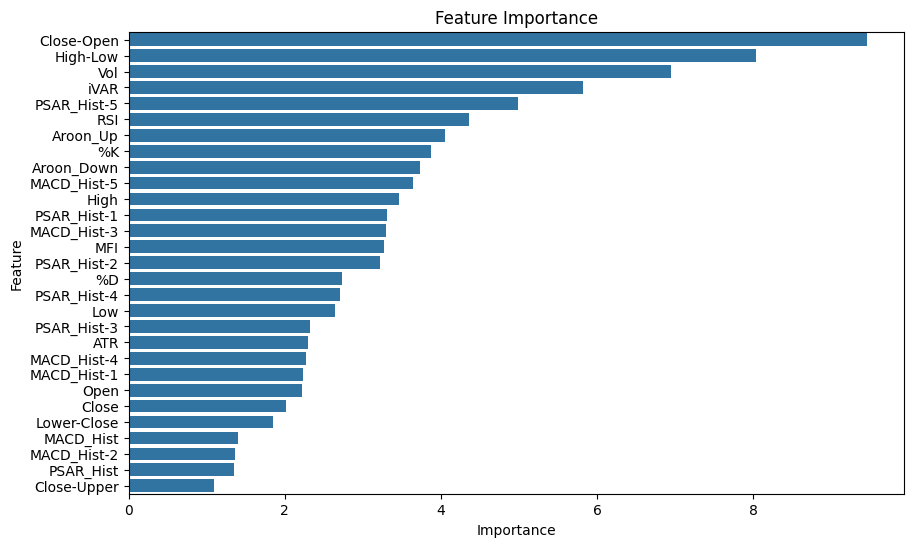

In [48]:
import seaborn as sns
feature_importances = model.get_feature_importance()
feature_names = X_train.columns  # Получаем имена признаков

# Создаем DataFrame для удобства
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Визуализация важности признаков с помощью Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()